**Conteúdo do DataSet:**

**ID**: Identificador exclusivo <br/>
**Year_Birth**: Ano de nascimento<br/>
**Education**: Nível de escolaridade <br/>
**Marital_Status**: Estado civil <br/>
**Income**: Renda familiar anual <br/>
**Kidhome**: Número de crianças em casa <br/>
**Teenhome**: Número de adolescentes na casa <br/>
**Dt_Customer**: Data do cadastro do cliente na empresa <br/>
**Recency**: Número de dias desde a última compra do cliente <br/>
**Complain**: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário <br/>
**MntWines**: Valor gasto em vinho nos últimos 2 anos <br/>
**MntFruits**: Valor gasto em frutas nos últimos 2 anos <br/>
**MntMeatProducts**: Valor gasto em carne nos últimos 2 anos <br/>
**MntFishProducts**: Valor gasto em pescado nos últimos 2 anos <br/>
**MntSweetProducts**: Valor gasto em doces nos últimos 2 anos <br/>
**MntGoldProds**: Valor gasto em ouro nos últimos 2 anos <br/>
**NumDealsPurchases**: Número de compras feitas com desconto <br/>
**AcceptedCmp1**: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário <br/>
**AcceptedCmp2**: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário <br/>
**AcceptedCmp3**: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário <br/>
**AcceptedCmp4**: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário <br/>
**AcceptedCmp5**: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário <br/>
**Response**: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário <br/>
**NumWebPurchases**: Número de compras realizadas através do site da empresa <br/>
**NumCatalogPurchases**: Número de compras feitas usando um catálogo <br/>
**NumStorePurchases**: Número de compras feitas diretamente nas lojas <br/>
**NumWebVisitsMonth**: Número de visitas ao site da empresa no último mês <br/>

<div style="color:#8E0114; font-size:150%; text-align:left; border-radius:5px">
    <h4><u> BIBLIOTECAS UTILIZADAS </u></h4>
</div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import silhouette_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

import warnings
warnings.filterwarnings("ignore")

<div style="color:#8E0114; font-size:150%; text-align:left; border-radius:5px">
    <h4><u> IMPORTAR DADOS </u></h4>
</div>

In [2]:
dataset = pd.read_csv('../dados/ml_project1_data.csv')
display(dataset[:3])

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  

[3 rows x 29 columns]

In [3]:
print('\nA base de dados possui {} linhas e {} colunas.'.format(dataset.shape[0], dataset.shape[1]))


A base de dados possui 2240 linhas e 29 colunas.


<div style="color:#8E0114; font-size:150%; text-align:left; border-radius:5px">
    <h4><u> TRATAR DADOS </u></h4>
</div>

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Podemos já observar algumas informações referentes a nossa base de dados:**

1) Temos valores sobre *Income* faltando; <br>

2) *Dt_Customer* refere-se a *datetime*, porém está com os dados no formato errôneo de *object*; <br>

3) Existem variáveis quantitativas e qualitativas para serem trabalhadas. <br>

**Vamos iniciar os tratamentos:**

**De início excluiremos os registros que possuem informações incompletas:**

In [5]:
aux = dataset.isnull().sum()
aux = aux[aux.values!=0]

print('\nComo existem {} valores faltantes na coluna {}, sendo apenas {:.0%} dos dados, desconsideraremos estas informações.'
      .format(aux[0], aux.index[0], aux[0]/len(dataset)))


Como existem 24 valores faltantes na coluna Income, sendo apenas 1% dos dados, desconsideraremos estas informações.


In [6]:
dataset = dataset.dropna()

print('\nNossa base de dados agora possui {} linhas.'.format(dataset.shape[0]))


Nossa base de dados agora possui 2216 linhas.


**Agora corrigiremos o tipo de dado da coluna *Dt_Customer:***

In [7]:
dataset['Dt_Customer'] = pd.to_datetime(dataset['Dt_Customer'])

print('\nAlteramos o tipo de dado da coluna em questão. Agora "Dt_Customer" está como "{}".'
      .format(dataset['Dt_Customer'].dtypes))


Alteramos o tipo de dado da coluna em questão. Agora "Dt_Customer" está como "datetime64[ns]".


Ainda conseguimos melhorar a qualidade desta informação, vamos incluir na nossa base uma feature de *Enrollment_Time* com o tempo (em anos) de cadastro deste cliente.

Para isso faremos:

In [8]:
dataset['Enrollment_Time'] = 2022 - dataset['Dt_Customer'].dt.year
dataset = dataset.drop('Dt_Customer', axis=1)

**Existem algumas features que não possuímos informação sobre, como por exemplo:**

- ID;
- Year_Birth;
- Z_CostContact;
- Z_Revenue

Na primeira temos o que parece ser um identificador do cliente, já a segunda parece ser bem objetiva trazendo o ano de nascimento dos clientes, mas as outras duas não estão tão claras assim. <br>

Vamos analisar:

In [9]:
display(
    dataset[['ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue']].describe().transpose().drop(['25%', '50%', '75%'], axis=1)
)

count         mean          std     min      max
ID             2216.0  5588.353339  3249.376275     0.0  11191.0
Year_Birth     2216.0  1968.820397    11.985554  1893.0   1996.0
Z_CostContact  2216.0     3.000000     0.000000     3.0      3.0
Z_Revenue      2216.0    11.000000     0.000000    11.0     11.0

Ao que parece todas as informações de *Z_CostContact* e *Z_Revenue* são iguais. <br>

Vamos checar a quantidade de valores únicos que existem nestas features. <br>

Esta análise também pode nos esclarecer sobre a dúvida referente ao *ID*.

In [10]:
print('\n Feature       / Qtd Valores Únicos')
print('-'*35)
print(dataset[['ID', 'Z_CostContact', 'Z_Revenue']].nunique())


 Feature       / Qtd Valores Únicos
-----------------------------------
ID               2216
Z_CostContact       1
Z_Revenue           1
dtype: int64


Podemos perceber que o *ID* é um identificador do cliente, pois existe um valor exclusivo para cada operação. <br>

Já as outras duas features não trazem informações relevantes para o nosso problema, visto que todos os valores nelas contidos são iguais. <br>

Excluiremos então *Z_CostContact*, *Z_Revenue* e transformaremos nosso *ID* no índice da nossa base de dados.

In [11]:
dataset = dataset.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

dataset = dataset.set_index('ID')

**Aproveitando a verificação dos valores únicos vamos identificar as categorias das variáveis qualitativas:**

- Education;
- Marital_Status.

In [12]:
print(dataset.value_counts('Education'))
print('-'*20)
print(dataset.value_counts('Marital_Status'))

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
dtype: int64
--------------------
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
dtype: int64


**Para facilitar análises futuras diminuiremos nossas categorias em ambas variáveis:**

1) Em *Education* agruparemos nossas 5 categorias em 3, **Postgraduate** sendo PhD + Master, **Graduation** e **High School** sendo 2n Cycle + Basic; <br>


2) Em *Marital_Status* nossas categorias estão ainda mais diluídas. agruparemos nossas 8 categorias em 2, **Accompanied** sendo Married + Together e **Alone** sendo todos os demais. <br>

**Então:**

In [13]:
dataset = dataset.replace({'PhD': 'Postgraduate', 'Master': 'Postgraduate', 
                           '2n Cycle': 'High School', 'Basic': 'High School',
                           'Married': 'Accompanied', 'Together': 'Accompanied',
                           'Single': 'Alone', 'Divorced': 'Alone', 'Widow': 'Alone', 'Absurd': 'Alone', 'YOLO': 'Alone'})

**Criando a feature Mnt_Total**:

O valor gasto na compra está separado por categoria, vamos criar uma feature Mnt_Total para nos auxiliar no valor total gasto em compras.

**Para isso:**

In [14]:
dataset['Mnt_Total'] = dataset[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                                'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

**Criando a feature Dependents:**

Temos duas informações na base de dados, *Kidhome* e *Teenhome*, que podem ser analisadas de forma conjunta. Assumiremos o número de crianças + adolescentes na casa como o total de dependentes. Criando assim a nova feature Dependents.

**Sendo assim:**

In [15]:
dataset['Dependents'] = dataset[['Kidhome', 'Teenhome']].sum(axis=1)
dataset = dataset.drop(['Kidhome', 'Teenhome'], axis=1)

**Criando a feature AcceptedAnyCmp:**

Temos o resultado sobre as 5 campanhas anteriores de marketing, uma possível análise a ser feita é sobre as características de clientes que geraram resultados positivos em qualquer uma das ofertas realizadas, para isso criaremos uma feature auxiliar chamada *AcceptedAnyCmp* sendo o somatório de *AcceptedCmp1, 2, 3, 4, 5*.

**Então:**

In [16]:
dataset['AcceptedAnyCmp'] = dataset[
                                ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
                            ].sum(axis=1)

**Agora temos nossa base de dados verificada e tratada.**

**Vamos visualizar:**

In [17]:
display(dataset[:3])
print('\nA base de dados possui {} linhas e {} colunas.'.format(dataset.shape[0], dataset.shape[1]))

Year_Birth   Education Marital_Status   Income  Recency  MntWines  \
ID                                                                        
5524        1957  Graduation          Alone  58138.0       58       635   
2174        1954  Graduation          Alone  46344.0       38        11   
4141        1965  Graduation    Accompanied  71613.0       26       426   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
ID                                                                   ...   
5524         88              546              172                88  ...   
2174          1                6                2                 1  ...   
4141         49              127              111                21  ...   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
ID                                                                       
5524             0             0             0             0         0   
2174             0             0             0             0         0   
4141             0             0             0             0         0   

      Response  Enrollment_Time  Mnt_Total  Dependents  AcceptedAnyCmp  
ID                                                                      
5524         1               10       1617           0               0  
2174         0                8         27           2               0  
4141         0                9        776           0               0  

[3 rows x 27 columns]


A base de dados possui 2216 linhas e 27 colunas.


<div style="color:#8E0114; font-size:150%; text-align:left; border-radius:5px">
    <h4><u> EXPLORAR DADOS </u></h4>
</div>

Para tomarmos uma ideia inicial sobre as informações que os dados podem nos dar, faremos uma análise de correlação. Assim criamos hipóteses iniciais que podem nos ajudar a traçar alguns caminhos a serem seguidos no decorrer deste projeto.

**Vamos visualizar os valores de correlação em um mapa de calor:**

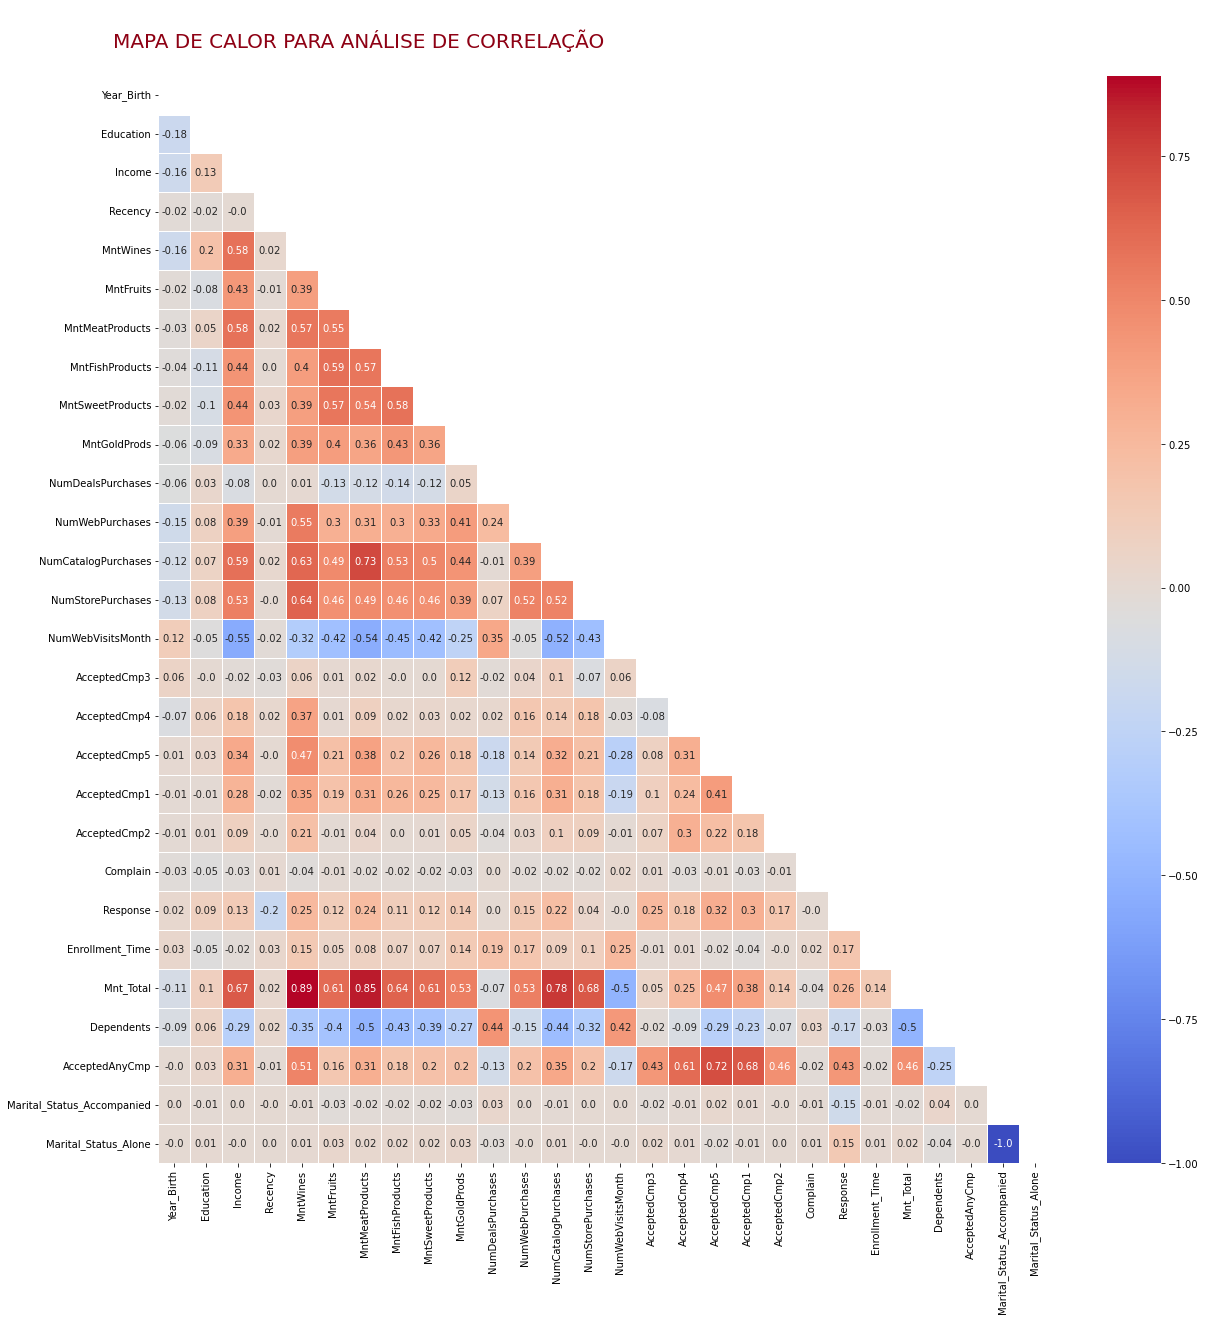

In [18]:
#tratar variáveis qualitativas
dataset_encoding = dataset.copy()
dataset_encoding = dataset_encoding.replace({'High School': 1, 'Graduation': 2, 'Postgraduate': 3})
dataset_encoding = pd.get_dummies(dataset_encoding)

#calcular correlação
data = dataset_encoding.corr()

#criar gráfico
plt.figure(figsize=(20,20))

mask = np.zeros_like(data)
mask[np.triu_indices_from(mask)] = True

plt.title('\nMAPA DE CALOR PARA ANÁLISE DE CORRELAÇÃO\n', fontsize=20, color='#8E0114', ha='right')
sns.heatmap(data=data.round(2), mask=mask, annot=True, fmt= '.2', cmap='coolwarm', linewidths=.7)
plt.show()

Como estamos trabalhando com dados amostrais de uma população, para podermos inferir estatisticamente que estes valores de correlação também representam um grupo maior de clientes, extrapolando os dados que temos conhecimento, realizaremos o teste de hipótese t.

**Abaixo temos o resultado do nosso teste:**

Com um nível de confiança de 95%, a interpretação deste resultado é dado como:

- **H0**: Não podemos aceitar a correlação a nível populacional;

- **H1**: A correlação é significativa a nível populacional.

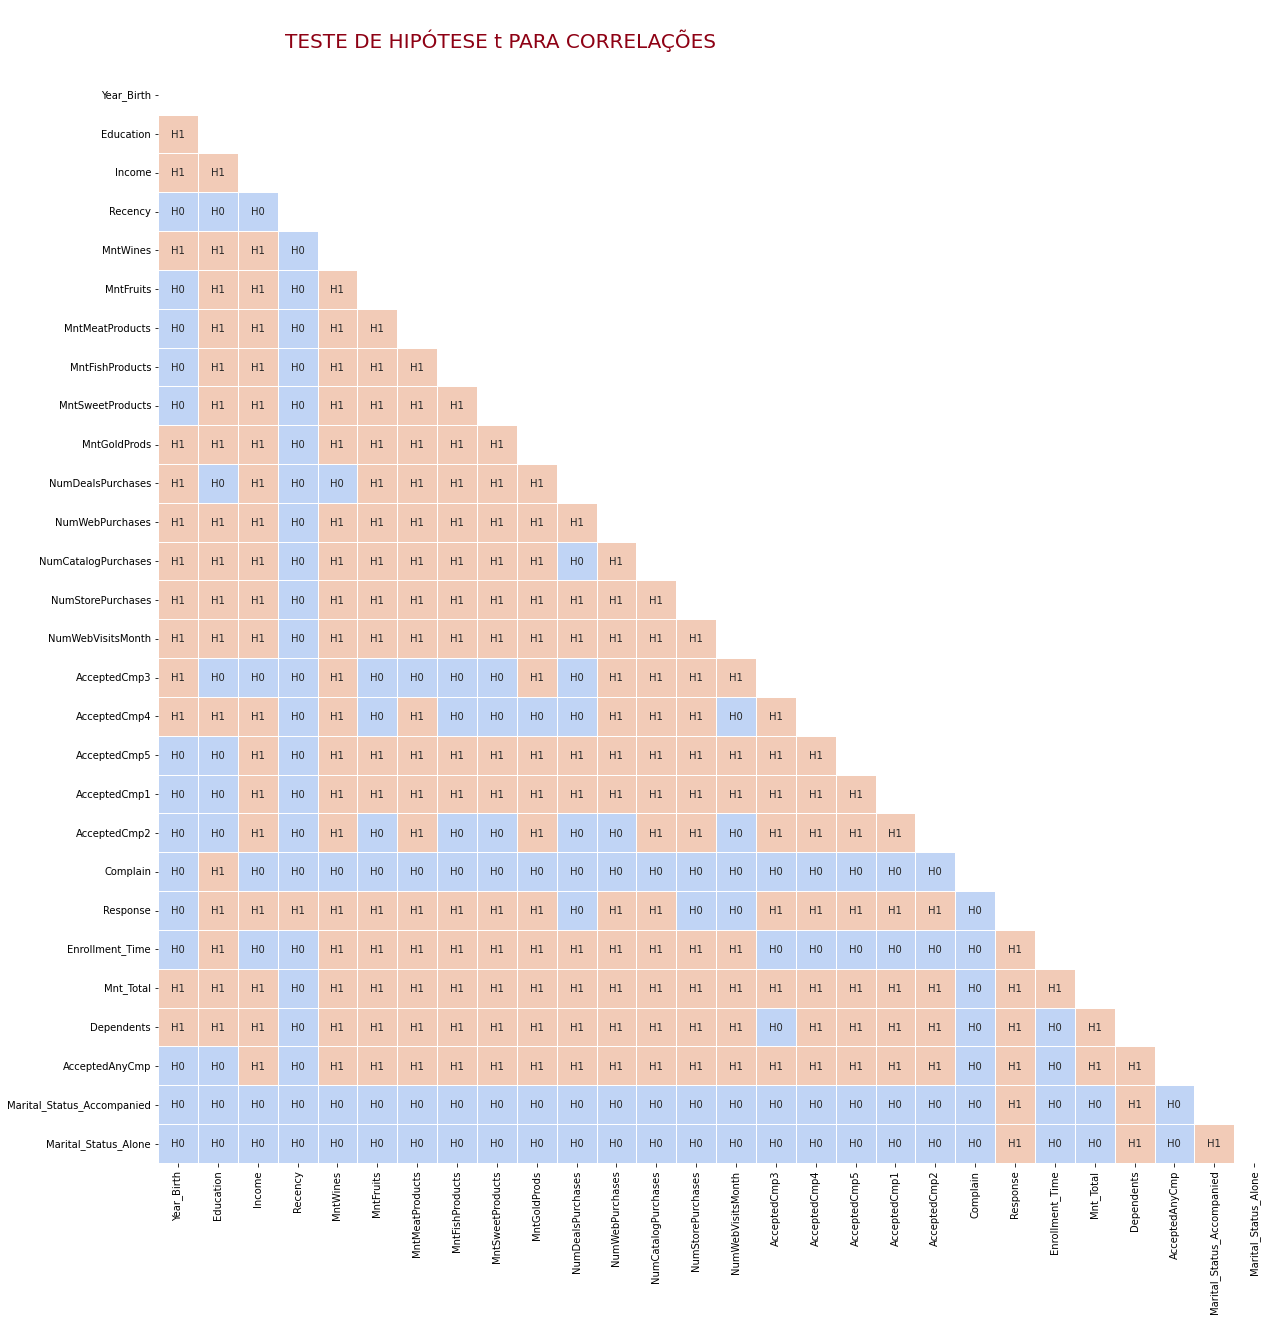

In [19]:
#calcular estatística do teste de hipótese t
teste_t_corr = data/np.sqrt((1-(data**2))/(len(dataset)-2))

#valor critico para teste bicaudal de 95% de confiança e (2216 - 2) graus de liberdade
valor_critico = 1.960

#verificar resultado do teste
teste_hip_t_corr = teste_t_corr.copy()
aux = []

for coluna in teste_hip_t_corr:
    for valor in teste_t_corr[coluna]:
        if valor > -valor_critico and valor < valor_critico:
            aux.append(0)
        else:
            aux.append(1)
    teste_hip_t_corr[coluna] = aux
    aux = []

#criar gráfico
plt.figure(figsize=(20,20))
plt.title('\nTESTE DE HIPÓTESE t PARA CORRELAÇÕES\n', fontsize=20, color='#8E0114', ha='right')
sns.heatmap(data=teste_hip_t_corr, mask=mask, cbar=False, cmap='coolwarm', vmin=-2, vmax=3, linewidths=.7,
            annot=teste_hip_t_corr.replace({0: 'H0', 1:'H1'}), fmt='')            
plt.show()

**Pela análise de correlação acima e seu respectivo teste de hipótese podemos tirar algumas conclusões:**

**Sobre a Renda (*Income*) do cliente:**

- Quanto maior sua renda maior seu gasto total nos últimos dois anos;
- Quanto maior a renda menos visitas no site da companhia foram realizadas no último mês;
- Quanto maior sua renda maior a preferência por compras através do catálogo e das lojas físicas;
- Quanto maior a renda maior a procura por vinhos e carnes, os produtos da classe ouro parecem não aderir muito bem.

**Sobre os gastos em compras (*MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProducts e MntTotal*):**

- O maior impacto no valor da compra pode ser elencado com o consumo de vinhos, carnes, peixes, frutas e doces;
- O volume de compras na web influência positivamente a compra de vinhos, mas como já observamos que a renda possui relação positiva mais forte com as compras em lojas físicas e catálogos, isso nos leva a pensar que clientes com rendas mais baixas preferem comprar vinhos pela internet;
- A compra de vinho sugere a compra de carnes para um possível acompanhamento, as demais categorias são igualmente relacionadas entre si;
- Pessoas com mais dependentes em casa tendem a gastar menos no geral, principalmente em carnes e peixes;
- Ao que parece, clientes com maiores gastos em vinhos tiveram maior aderência as ofertas de marketing realizadas, sendo da maior para a menor a campanha 5, 4, 1, 2 e 3.

**Sobre os canais de venda (*NumWebPurchases, NumCatalogPurchases e NumStorePurchases*):**

- Clientes que gastam mais em compras tendem a comprar mais através de catálogos, lojas físicas e, por último, pela internet, respectivamente;
- O "carro-chefe" de cada canal de venda aparenta ser, do catálogo as carnes, das lojas físicas os vinhos e do site os produtos classe ouro.

**Sobre compras com descontos e número de visitas no site da empresa (*NumDealsPurchases e NumWebVisitsMonth*):**

- Pessoas que compram com mais desconto tendem a ter mais dependentes em casa, visitaram mais o site no último mês e tendem a gastar mais na internet que os demais canais de venda;
- Quanto maior o número de visitas no site, menor o gasto em compras e menor a compra através de catálogos e lojas físicas;
- Fato curioso que um maior número de visitas ao site não resulta em maiores compras pela internet.

<hr>

**Criada a ideia inicial, vamos agora analisar o perfil dos nossos clientes:**

Através dos quatro gráficos logo abaixo, podemos observar algumas características dos clientes entrevistados: <br>

**50% deles têm graduação completa** enquanto **38% possuem algum tipo de pós-graduação** e apenas **11% possuem no máximo o ensino médio**. <br>

**65% possuem algum relacionamento** contra **35% vivendo sozinho**. <br>

Metade dos entrevistados, **50%, possuem apenas um dependente**, **29% não possuem nenhum dependente** em casa, enquanto **19% possuem 2** e apenas **2% possuem 3**. Aqui já conseguimos observar uma característica interessante sobre o público da empresa, pois, como já constatamos que pessoas com mais dependentes tendem a gastar menos, que já vai contra o esperado, e utilizando de mais descontos, vimos que cerca de 80% dos nossos clientes possuem no máximo um dependente, ou seja, **a empresa não parece ser muito atrativa para famílias maiores**. <br>

O canal de venda preferido ficou com as **lojas físicas com 46% das ocorrências de compras** seguido pelas **compras na internet com 33%** e por último o **catálogo, apresentando 21%**. Tínhamos observado que clientes que compram através do catálogo tendem a gastar um pouco mais, porém aqui ele ficou como o preterido entre os canais de venda. Talvez um incentivo maior neste canal seja uma oportunidade interessante para aumentar o faturamento com as vendas.

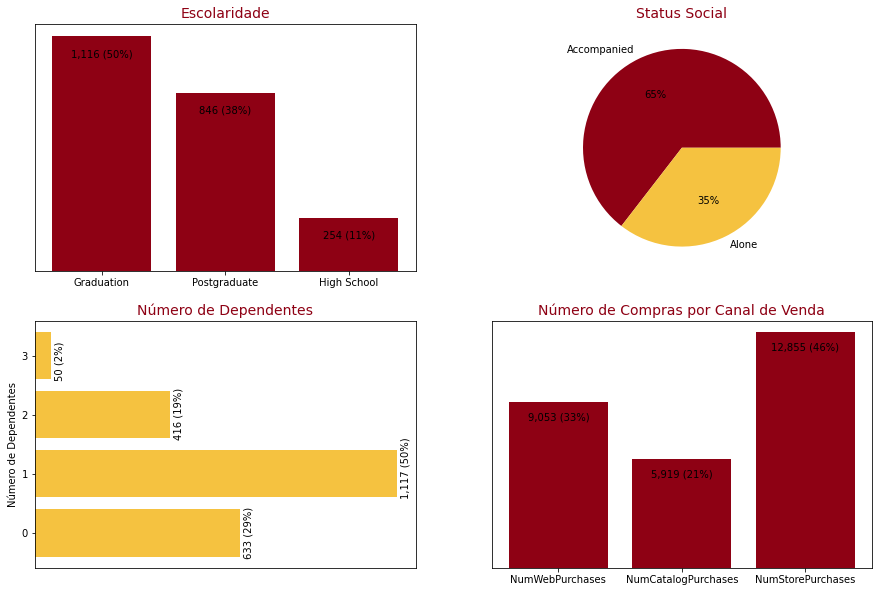

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))

ax[0, 0].bar(x=dataset.value_counts('Education').index , height=dataset.value_counts('Education').values, color='#8E0114')
ax[0, 0].set_xlabel('')
ax[0, 0].set_title('Escolaridade', fontsize=14, color='#8E0114')
ax[0, 0].get_yaxis().set_visible(False)
for p in ax[0, 0].patches:
    height = p.get_height()
    ax[0, 0].text(p.get_x()+p.get_width()/2., height - 100, '{:,.0f} ({:.0%})'.format(height, height/len(dataset)), ha='center')

ax[0, 1].pie(x=dataset.value_counts('Marital_Status').values, 
             labels = ['Accompanied', 'Alone'], colors = ['#8E0114', '#F5C240'], autopct='%.0f%%')
ax[0, 1].set_xlabel('')
ax[0, 1].set_title('Status Social', fontsize=14, color='#8E0114')

ax[1, 0].barh(y=dataset['Dependents'].value_counts().index, width=dataset['Dependents'].value_counts().values, color='#F5C240')
ax[1, 0].set_yticks([0,1,2,3])
ax[1, 0].set_ylabel('Número de Dependentes')
ax[1, 0].set_xlabel('Contagem')
ax[1, 0].set_title('Número de Dependentes', fontsize=14, color='#8E0114')
ax[1, 0].get_xaxis().set_visible(False)
for p in ax[1, 0].patches:
    width=p.get_width()
    ax[1, 0].text(width+10, p.get_y(), '{:,.0f} ({:.0%})'.format(width, width/len(dataset)), rotation=90)

ax[1, 1].bar(x='NumWebPurchases', height=dataset['NumWebPurchases'].sum(), color='#8E0114')
ax[1, 1].bar(x='NumCatalogPurchases', height=dataset['NumCatalogPurchases'].sum(), color='#8E0114')
ax[1, 1].bar(x='NumStorePurchases', height=dataset['NumStorePurchases'].sum(), color='#8E0114')
ax[1, 1].set_title('Número de Compras por Canal de Venda', fontsize=14, color='#8E0114')
ax[1, 1].get_yaxis().set_visible(False)
NumPurchases = dataset[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sum()
for p in ax[1, 1].patches:
    height = p.get_height()
    ax[1, 1].text(p.get_x()+p.get_width()/2., height -1000, '{:,.0f} ({:.0%})'.format(height, height/NumPurchases), ha='center')

plt.show()

Sobre as campanhas de marketing já realizadas, podemos reparar, a seguir, uma aderência do público de **21%, ou seja, 459 pessoas aceitaram ao menos uma das ofertas**, sendo que:

**70% destas pessoas aceitaram apenas 1 oferta**; <br>
**18% aceitaram 2 ofertas**; <br>
**10% aceitaram 3**; <br>
**2% aceitaram 4**; <br>
**Nenhuma pessoa aceitou todas as 5 ofertas já realizadas.**

Existe uma discrepância muito grande entre os números de ofertas aceitas, na grande maioria das vezes (70%) apenas 1 das 5 campanhas atingiu de fato o cliente. Isso, mesmo com os alcances das campanhas sendo parecidas, a excluir a segunda campanha, que teve bem menos aceitação (30) se comparada as demais. <br>

**Fato animador é que existe uma margem boa para novas campanhas ainda, se 70% dos clientes aceitam apenas uma oferta, ainda temos uma margem de 79% de clientes que não aceitaram ofertas em campanha alguma.**

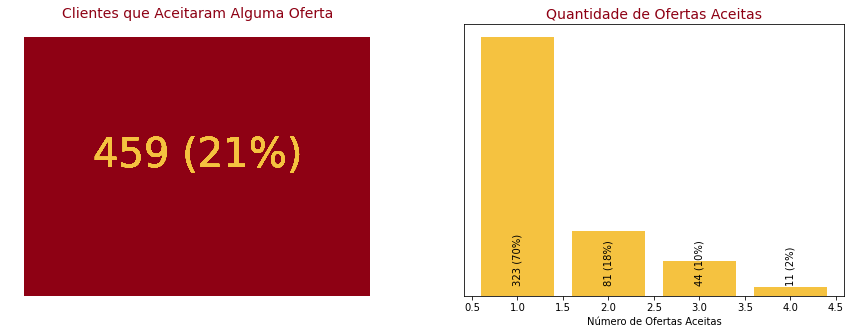

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].bar(x='AcceptedAnyCmp', height=dataset[dataset['AcceptedAnyCmp']!=0].count(), color='#8E0114')
ax[0].set_title('Clientes que Aceitaram Alguma Oferta', fontsize=14, color='#8E0114')
ax[0].axis('off')
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x()+p.get_width()/2., height/2,
               '{:,.0f} ({:.0%})'.format(height, height/len(dataset)), ha='center', fontsize=40, color='#F5C240')

ax[1].bar(x=dataset.value_counts('AcceptedAnyCmp').index[1:],
          height=dataset.value_counts('AcceptedAnyCmp').values[1:], color='#F5C240')
ax[1].set_xlabel('Número de Ofertas Aceitas')
ax[1].set_title('Quantidade de Ofertas Aceitas', fontsize=14, color='#8E0114')
ax[1].get_yaxis().set_visible(False)
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x()+p.get_width()/2., 15,
               '{:,.0f} ({:.0%})'.format(height, height/dataset.value_counts('AcceptedAnyCmp').values[1:].sum()),
               ha='center', rotation=90) 
plt.show()

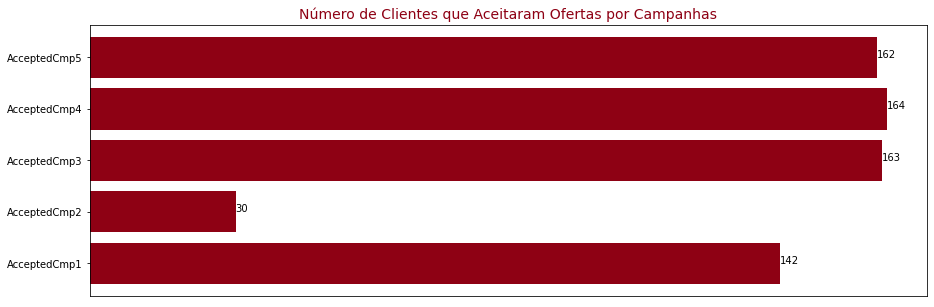

In [22]:
fig, ax = plt.subplots(figsize=(15,5))
for i in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    ax.barh(y=i, width=sum(dataset[i]), color='#8E0114')
ax.set_title('Número de Clientes que Aceitaram Ofertas por Campanhas', fontsize=14, color='#8E0114')
ax.get_xaxis().set_visible(False)
for p in ax.patches:
    width=p.get_width()
    ax.text(width, p.get_y()+.4, '{:,.0f}'.format(width))

Sobre insatisfação dos clientes podemos contabilizar um total de **21 clientes que reclamaram nos últimos dois anos** uma taxa bem pequena frente aos nossos dados com 2.216 registros, uma representação de menos de 1%. <br>

**Com relação ao número de visitas no site para o último mês, temos:**

In [23]:
total_visitas_site = dataset['NumWebVisitsMonth'].sum()
num_clientes_visitaram_site = dataset[dataset['NumWebVisitsMonth']!=0].shape[0]
media_visitas_site = dataset[dataset['NumWebVisitsMonth']!=0]['NumWebVisitsMonth'].mean()

filter_mask = dataset[dataset['NumWebPurchases']!=0]
qtd_clientes_visitaram_compraram_site = filter_mask[filter_mask['NumWebVisitsMonth']!=0]

print('\nTivemos um total de {:,} visitas no site;\nEstas visitas foram realizadas por {:,} clientes únicos, \
o que representa {:.1%} da base de dados;\nCom uma média de {:.0f} visitas para cada um.\n'
      .format(total_visitas_site, num_clientes_visitaram_site, num_clientes_visitaram_site/len(dataset) ,media_visitas_site))

print('De todos os clientes que visitaram o site no último mês, {:.1%} já fizeram alguma compra por lá.\n'
      .format(len(qtd_clientes_visitaram_compraram_site)/num_clientes_visitaram_site))


Tivemos um total de 11,787 visitas no site;
Estas visitas foram realizadas por 2,206 clientes únicos, o que representa 99.5% da base de dados;
Com uma média de 5 visitas para cada um.

De todos os clientes que visitaram o site no último mês, 98.0% já fizeram alguma compra por lá.



In [24]:
print('\nEstatítica sobre o número de Compras no Site por clientes que Visitam o Site no último mês:')
display(qtd_clientes_visitaram_compraram_site.describe().transpose()[10:11])
print('\n')


Estatítica sobre o número de Compras no Site por clientes que Visitam o Site no último mês:


count    mean       std  min  25%  50%  75%   max
NumWebPurchases  2162.0  4.1716  2.673445  1.0  2.0  4.0  6.0  27.0

Existe algum cliente que realizou 27 compras através do site, notoriamente este registro destoa dos demais, pois vemos que 75% dos clientes compraram até 6 vezes por meio deste canal de venda.

Mesmo com a presença deste outlier, pela distribuição dos nossos valores, podemos concluir que em média cada cliente comprou 4 vezes mediante a internet.

Somando às observações anteriores dos gráficos de correlação e de compras por canal de venda, onde:

- Se, apenas no último mês, tivemos 11.787 visitas no site, as vendas totais se concretizaram em apenas 9.053 oportunidades. Uma taxa aparentemente pequena, ainda mais se somarmos ao fato de que um maior número de visitações na web não impacta em um maior número de vendas no mesmo.<br>(Fica aqui um ponto de interesse sobre em qual prazo de tempo estas vendas aconteceram); <br>


- Estatisticamente pessoas que visitam mais o site, gastam menos no total e utilizam de mais descontos em suas compras, além de influenciar negativamente nas compras por catálogo e lojas físicas.

Temos então que, **o site da empresa recebe bastante visita dos clientes, mas não aparenta ser um bom cartão de visita**. Em sua grande maioria, parecem o utilizar para pesquisa de preços e produtos e, quanto mais pesquisam mais decidem por não comprar. <br>

Fica aqui o questionamento do "Porquê"? <br>
Pela experiência que o site proporciona? <br>
Pelos preços não estarem competitivos com o mercado? <br> 

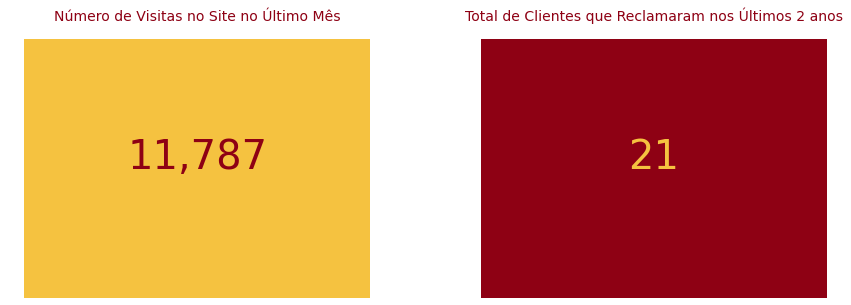

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].bar(x='NumWebVisitsMonth', height=total_visitas_site, color='#F5C240')
ax[0].set_title('Número de Visitas no Site no Último Mês', fontsize=14, color='#8E0114')
ax[0].axis('off')
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x()+p.get_width()/2., height/2, '{:,.0f}'.format(height), ha='center', fontsize=40, color='#8E0114')
    
ax[1].bar(x='Complain', height=dataset['Complain'].sum(), color='#8E0114')
ax[1].set_title('Total de Clientes que Reclamaram nos Últimos 2 anos', fontsize=14, color='#8E0114')
ax[1].axis('off')
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x()+p.get_width()/2., height/2, '{:,.0f}'.format(height), ha='center', fontsize=40, color='#F5C240')

plt.show()

Mais algumas características dos nossos dados:

A mediana do ano de nascimento dos clientes fica próximo de 1970, tendo eles hoje, cerca de 50 anos. O público tem em sua **maioria entre 65 e 30 anos de idade**. Observação para os, muito prováveis, dados incorretos contidos nesta informação, temos nascidos em torno de 1900.<br>

**A renda anual fica para a maioria dos clientes entre 25.000 e 75.000**, chegando a no máximo 100.000. Existem casos muito específicos de clientes que possuem mais que isso, sendo considerados pontos fora da curva. <br>

**Metade dos clientes gastaram até 400UM por compras**, 25% gastaram um pouco mais chegando a 1.000UM. 20% chega a consumir entre 1.000 e 2.000UM e uma minoria gasta mais do que isso, chegando a no máximo 2.500UM. <br>

Sobre o **número de dias desde a última compra**, este se apresenta de forma bastante uniforme, **indo de 0 até cerca de 3 meses**. A mediana fica em 1 mês e meio sem frequentar a empresa. Apesar de não muito forte a correlação, **quanto maior o número de dias desde a última compra, menor foi o interesse no projeto piloto da sexta campanha de marketing.**

**Segue os gráficos a seguir:**

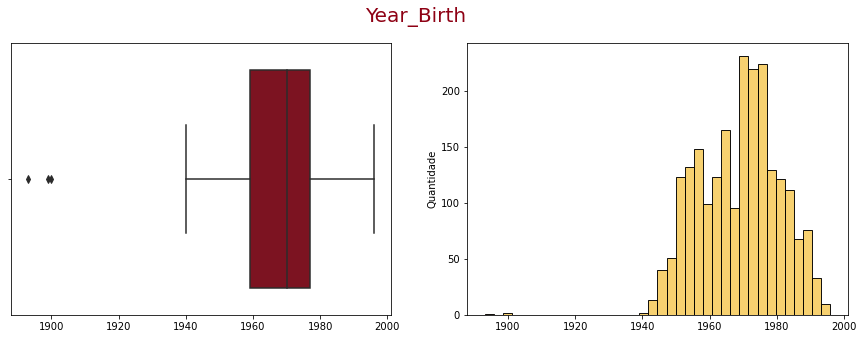

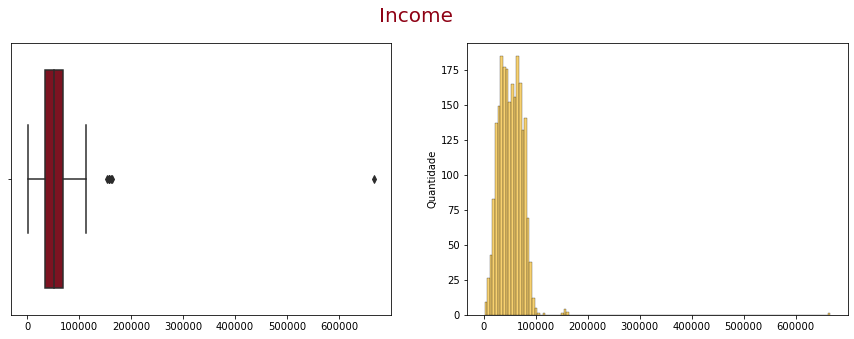

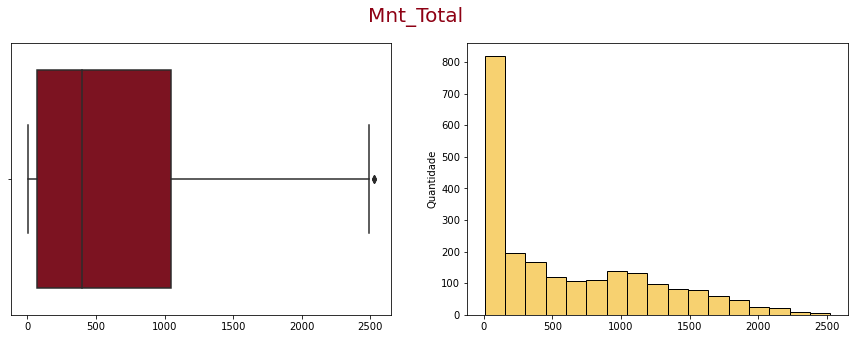

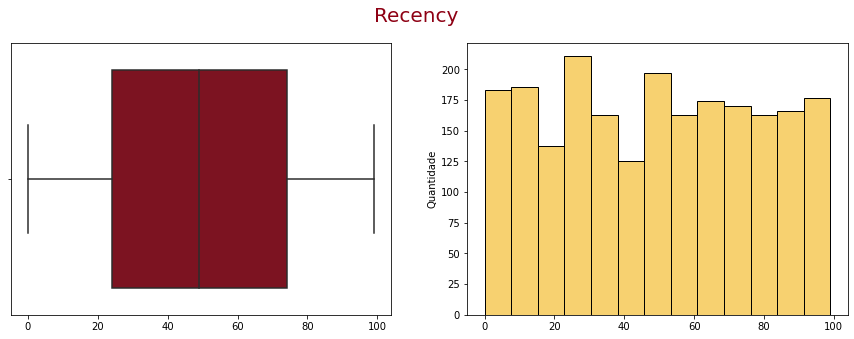

In [26]:
#função para criação das histogramas e boxplot
###########################################################
def hist_box_chart(dado):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    fig.suptitle(dado.name, fontsize=20, color='#8E0114')
    
    sns.boxplot(ax = ax[0], x=dado, color='#8E0114')
    ax[0].set_xlabel('')

    sns.histplot(ax=ax[1], data=dado, color='#F5C240')
    ax[1].set_xlabel('')
    ax[1].set_ylabel('Quantidade')
    
    return plt.show()
###########################################################

hist_box_chart(dataset['Year_Birth'])
hist_box_chart(dataset['Income'])
hist_box_chart(dataset['Mnt_Total'])
hist_box_chart(dataset['Recency'])

**Sobre as categorias de produtos:** <br>

Os produtos da categoria **vinho são o que geram maior faturamento para a empresa, representando 50% de toda receita**, seguido pelas **carnes com uma representação de 28%**, e os demais sem muitas diferenças significativas, tendo os produtos classe ouro com 7%, peixes com 6%, e doces e frutas com 4% cada.

Observamos também que, **praticamente 100% dos clientes compraram ao menos um item das categoria Carnes, Vinhos e Produtos Classe Ouro.** Pela natureza dos produtos, onde a diferença de preços entre estas três categorias não justifica a disparidade de receita entre elas, concluímos que a o **volume de vendas de vinho é o maior, seguido pelas carnes e com um volume muito menor que os dois anteriores, vêm os produtos classe ouro.**

**Peixes, Doces e Frutas aparecem no carrinho dos clientes em cerca de 80% das vezes**. Imaginando aqui que as frutas e doces são mais baratos que os peixes temos que, pela receita gerada de cada categoria, **os produtos vendidos em menor volume são os peixes, seguido pelos doces e frutas**.

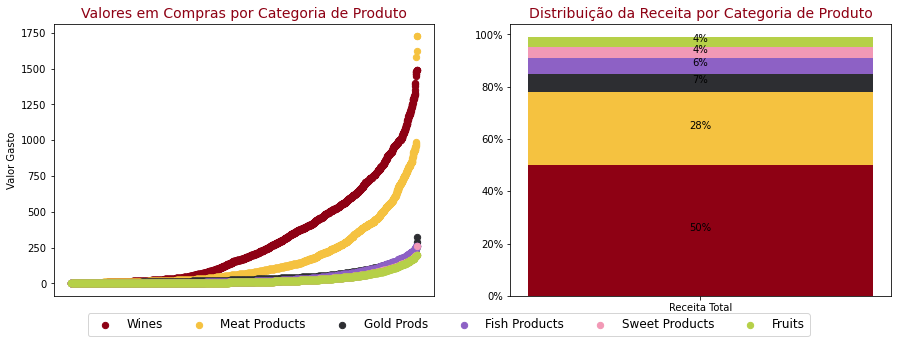

In [27]:
cat_produt = ['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts', 'MntSweetProducts', 'MntFruits']
label_prod = ['Wines', 'Meat Products', 'Gold Prods', 'Fish Products', 'Sweet Products', 'Fruits']
color_produt = ['#8E0114', '#F5C240', '#2D2E32', '#8D61C5', '#F299B6', '#B6D048']

fig, ax = plt.subplots(1, 2, figsize=(15,5))

for i, prod in enumerate(cat_produt):
    ax[0].scatter(y=dataset[prod].sort_values(), x=range(0,len(dataset)), label=label_prod[i], color=color_produt[i], s=40)
ax[0].set_title('Valores em Compras por Categoria de Produto', fontsize=14, color='#8E0114')
ax[0].set_ylabel('Valor Gasto')
ax[0].get_xaxis().set_visible(False)
fig.legend(loc='lower center', ncol=6, fontsize=12)

aux= []
for i, prod in enumerate(cat_produt):
    perc_vendas = (dataset[prod].sum()/dataset['Mnt_Total'].sum()).round(2)*100
    aux.append(perc_vendas)
    ax[1].bar(x='Receita Total', height=perc_vendas, bottom=sum(aux[:i]), color=color_produt[i])
ax[1].set_title('Distribuição da Receita por Categoria de Produto', fontsize=14, color='#8E0114')   
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter())
for j, p in enumerate(ax[1].patches):
    height = p.get_height()
    ax[1].text(p.get_x()+p.get_width()/2., (sum(aux[:j+1])+sum(aux[:j]))/2, '{:.0%}'.format(height/100), ha='center')

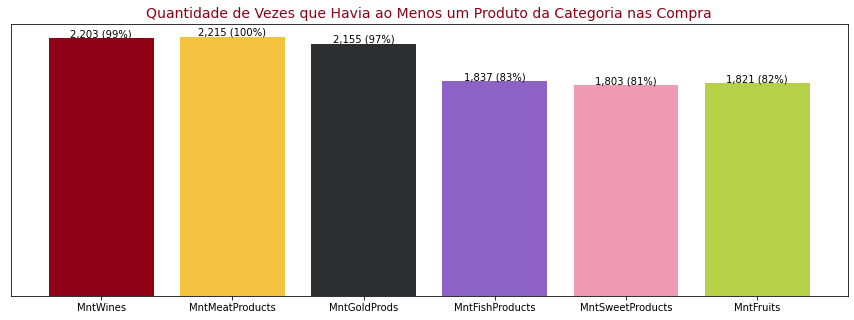

In [28]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Quantidade de Vezes que Havia ao Menos um Produto da Categoria nas Compra', fontsize=14, color='#8E0114')
for i, prod in enumerate(cat_produt):
    ax.bar(x=prod, height=dataset[dataset[prod]!=0].shape[0], color=color_produt[i])
ax.get_yaxis().set_visible(False)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+10, '{:,.0f} ({:.0%})'.format(height, height/len(dataset)), ha='center')

<div style="color:#8E0114; font-size:150%; text-align:left; border-radius:5px">
    <h4><u> SEGMENTAR CLIENTES </u></h4>
</div>

Após a exploração dos dados, já conseguimos mapear que nossos dados possuem variáveis qualitativas e quantitativas. Agora buscaremos segmentar os clientes em grupos (**cluster**) afim de detectar padrões ainda não identificados. Para isso utilizaremos do algoritmo **K-Means**. Como este algoritmo têm por finalidade a minimização de medidas de distância, nossos dados não podem estar em unidades muito discrepantes entre si. Caso contrário a segmentação pode não ocorrer da melhor maneira possível. Para corrigirmos este "problema" **padronizaremos nosso dataset**.

Outro ponto importante para conseguirmos uma boa segmentação é a **seleção de recursos** a serem utilizados. Nosso algoritmo em questão possui um melhor desempenho para variáveis quantitativas, sendo assim já **descartaremos as variáveis qualitativas** da nossa seleção de recursos. Outras que também serão **descartadas são as variáveis binárias**, pois não parece fazer muito sentido calcular distâncias entre elas visando criar um agrupamento. Por fim, como no final criaremos um modelo preditivo para melhorar o resultado da próxima campanha de marketing, para evitarmos qualquer possibilidade de vazamento de dados, **descartaremos também as variáveis sobre campanhas anteriores**.   

**Resumindo, podemos dividir nossa base de dados em 5 categorias. Sendo elas**: <br>

**Produtos**: 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Mnt_Total' <br>
**Canal de Venda**: 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases' <br>
**Pessoas**: 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Dependents' <br>
**Campanhas**: 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'AcceptedAnyCmp' <br>
**Negócios**: 'Enrollment_Time', 'Recency', 'Complain', 'NumDealsPurchases', 'NumWebVisitsMonth' <br>

**Assim, para nossa seleção de recursos a serem considerados no K-Means consideraremos:**

- 'Mnt_Total', para representar a categoria de Produtos;
- 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases' para descobrirmos informações sobre os Canais de Venda;
- Na categoria de Pessoas, desconsideraremos as variáveis qualitativas e 'Dependents', que se resume basicamente a 0 ou 1;
- Para evitarmos qualquer possibilidade de vazamento de dados nenhuma informação sobre Campanhas será utilizada;
- Para categoria Negócios descartaremos apenas 'Complain' por ser uma variável binária.

In [29]:
selecao_recurso = ['Mnt_Total',
                   'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                   'Year_Birth', 'Income', 
                   'NumDealsPurchases', 'NumWebVisitsMonth']

**Padronização dos dados:**

In [30]:
dataset_z = dataset[selecao_recurso].copy()
dataset_z = (dataset_z - dataset_z.mean())/dataset_z.std()

Agora já temos nosso "dataset_z" padronizado, com todas as características com média igual a 0 desvio padrão igual 1.

Um fator importante agora é **definir o número k de clusters** a serem criados. <br>

Para auxílio nesta tomada de decisão utilizaremos do **Método do Cotovelo e da Silhueta**:

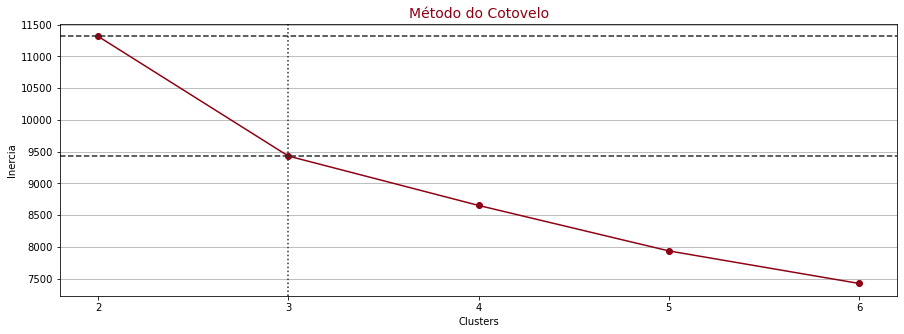

In [31]:
k = []
sse = []

for i in range(2,7):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=1).fit(dataset_z)
    #kmeans.fit(dataset_z)
    k.append(i)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(15,5))
plt.plot(k, sse, marker='o', color='#8E0114')
plt.xticks(k)
plt.xlabel('Clusters')
plt.ylabel('Inercia')
plt.title('Método do Cotovelo', fontsize=14, color='#8E0114')
plt.axvline(3, ls=":", c="#2D2E32")
plt.axhline(sse[0], ls="--", c="#2D2E32")
plt.axhline(sse[1], ls="--", c="#2D2E32")
plt.grid(axis='y')
plt.show()

In [32]:
for i in range(2,7):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans.fit(dataset_z)
    print('{} clusters -> Método da Silhueta: {:.3f}'.format(i, silhouette_score(dataset_z, kmeans.labels_)))

2 clusters -> Método da Silhueta: 0.358
3 clusters -> Método da Silhueta: 0.317
4 clusters -> Método da Silhueta: 0.296
5 clusters -> Método da Silhueta: 0.214
6 clusters -> Método da Silhueta: 0.210


Pelos resultados obtidos acima ficamos entre 2 e 3 clusters como ideal para o nosso problema. Para tentarmos aumentar a riqueza de informações, definimos então nosso k como sendo igual a 3.

In [33]:
k = 3

**Definido nosso k, podemos criar nosso modelo de aprendizado supervisionado para segmentação dos clientes:**

In [34]:
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=1)

kmeans.fit(dataset_z)
dataset_z['Cluster'] = kmeans.labels_

dataset_final = dataset.copy()
dataset_final = dataset.merge(dataset_z['Cluster'], left_on='ID', right_on=dataset.index).set_index('ID')

In [35]:
print(f'\nVerificando a convergência:\n\nNúmero de iterações executadas: {kmeans.n_iter_}')


Verificando a convergência:

Número de iterações executadas: 9


<hr>

**Concluída a segmentação, vamos agora analisar as caracteríisticas dos grupos criados:**

Segmentamos nossa base de clientes em 3 grupos distintos, um primeiro denominado **Cluster 0**, representando **31% dos nossos clientes**, o segundo grupo, **Cluster 1**, é o nosso maior com **45%** e, por fim, temos o **Cluster 2** com **24%**.

Pela análise do gráfico "Diferença (%) das Médias dos Clusters com a Média Geral dos Dados" exibido logo abaixo, podemos notar como o grupo se comporta, na média, se comparado ao todo, em cada uma das características da base de dados. 

Na visualização dos histogramas a seguir fica mais claro a distinção no comportamento de cada classe de clientes.

**As características mais fortes observados são:**
<p>
<p>
<div style="color:#8E0114"><u><b>CLUSTER 0:</b></u></div>

Os clientes que pertencem a este grupo possuem uma **renda anual acima da média** e por isso acabam **gastando mais no geral**, em todas as categorias de produtos. Possuem uma maior preferência por **compras através dos catálogos e lojas físicas**, sendo neste, o canal que mais compras realizou. **Descontos não parece ser um chamativo muito grande** para eles, visto que sua utilização ficou bem abaixo da média. Outra característica forte deste grupo é que eles **visitam bem pouco o site da empresa**. <br>

**Possuem menos dependentes** e, de todas as campanhas de marketing já realizadas, este grupo foi o que **mais interesse teve nas ofertas**.
<p>
<p>
<div style="color:#8E0114"><u><b>CLUSTER 1:</b></u></div>

Nosso maior grupo se caracteriza pelos clientes com **renda abaixo da média**, e, com consequência, **acabam por consumir menos**, tanto em valor gasto quanto em quantidade de compras, para todos os produtos e em todos os canais de venda. Mesmo com uma renda média menor, **não se destacam pelo número de descontos utilizados**. Já para o **número de reclamações, estão acima da média**, apesar de a empresa ter este índice baixíssimo. Neste grupo temos a **menor adesão geral às campanhas de marketing**.
<p>
<p>
<div style="color:#8E0114"><u><b>CLUSTER 2:</b></u></div>

Estes clientes são os **intermediários**, representam aqui nosso menor grupo. Sua **renda anual se aproxima bastante de uma renda média** de todos os clientes. Fato que chama atenção é que este grupo é o que **mais realiza compras no site**, e são também os que **mais utilizam descontos**.

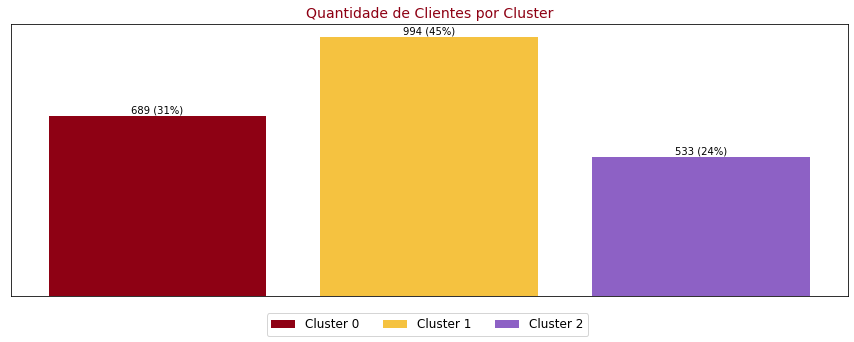

In [36]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Quantidade de Clientes por Cluster', fontsize=14, color='#8E0114')
color = ['#8E0114', '#F5C240', '#8D61C5']
for i in range(0, k):
    ax.bar(x=i, height=len(dataset_final[dataset_final['Cluster']==i]), color=color[i], label=f'Cluster {i}')
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
fig.legend(loc='lower center', ncol=3, fontsize=12)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+10, '{:,.0f} ({:.0%})'.format(height, height/len(dataset)), ha='center')

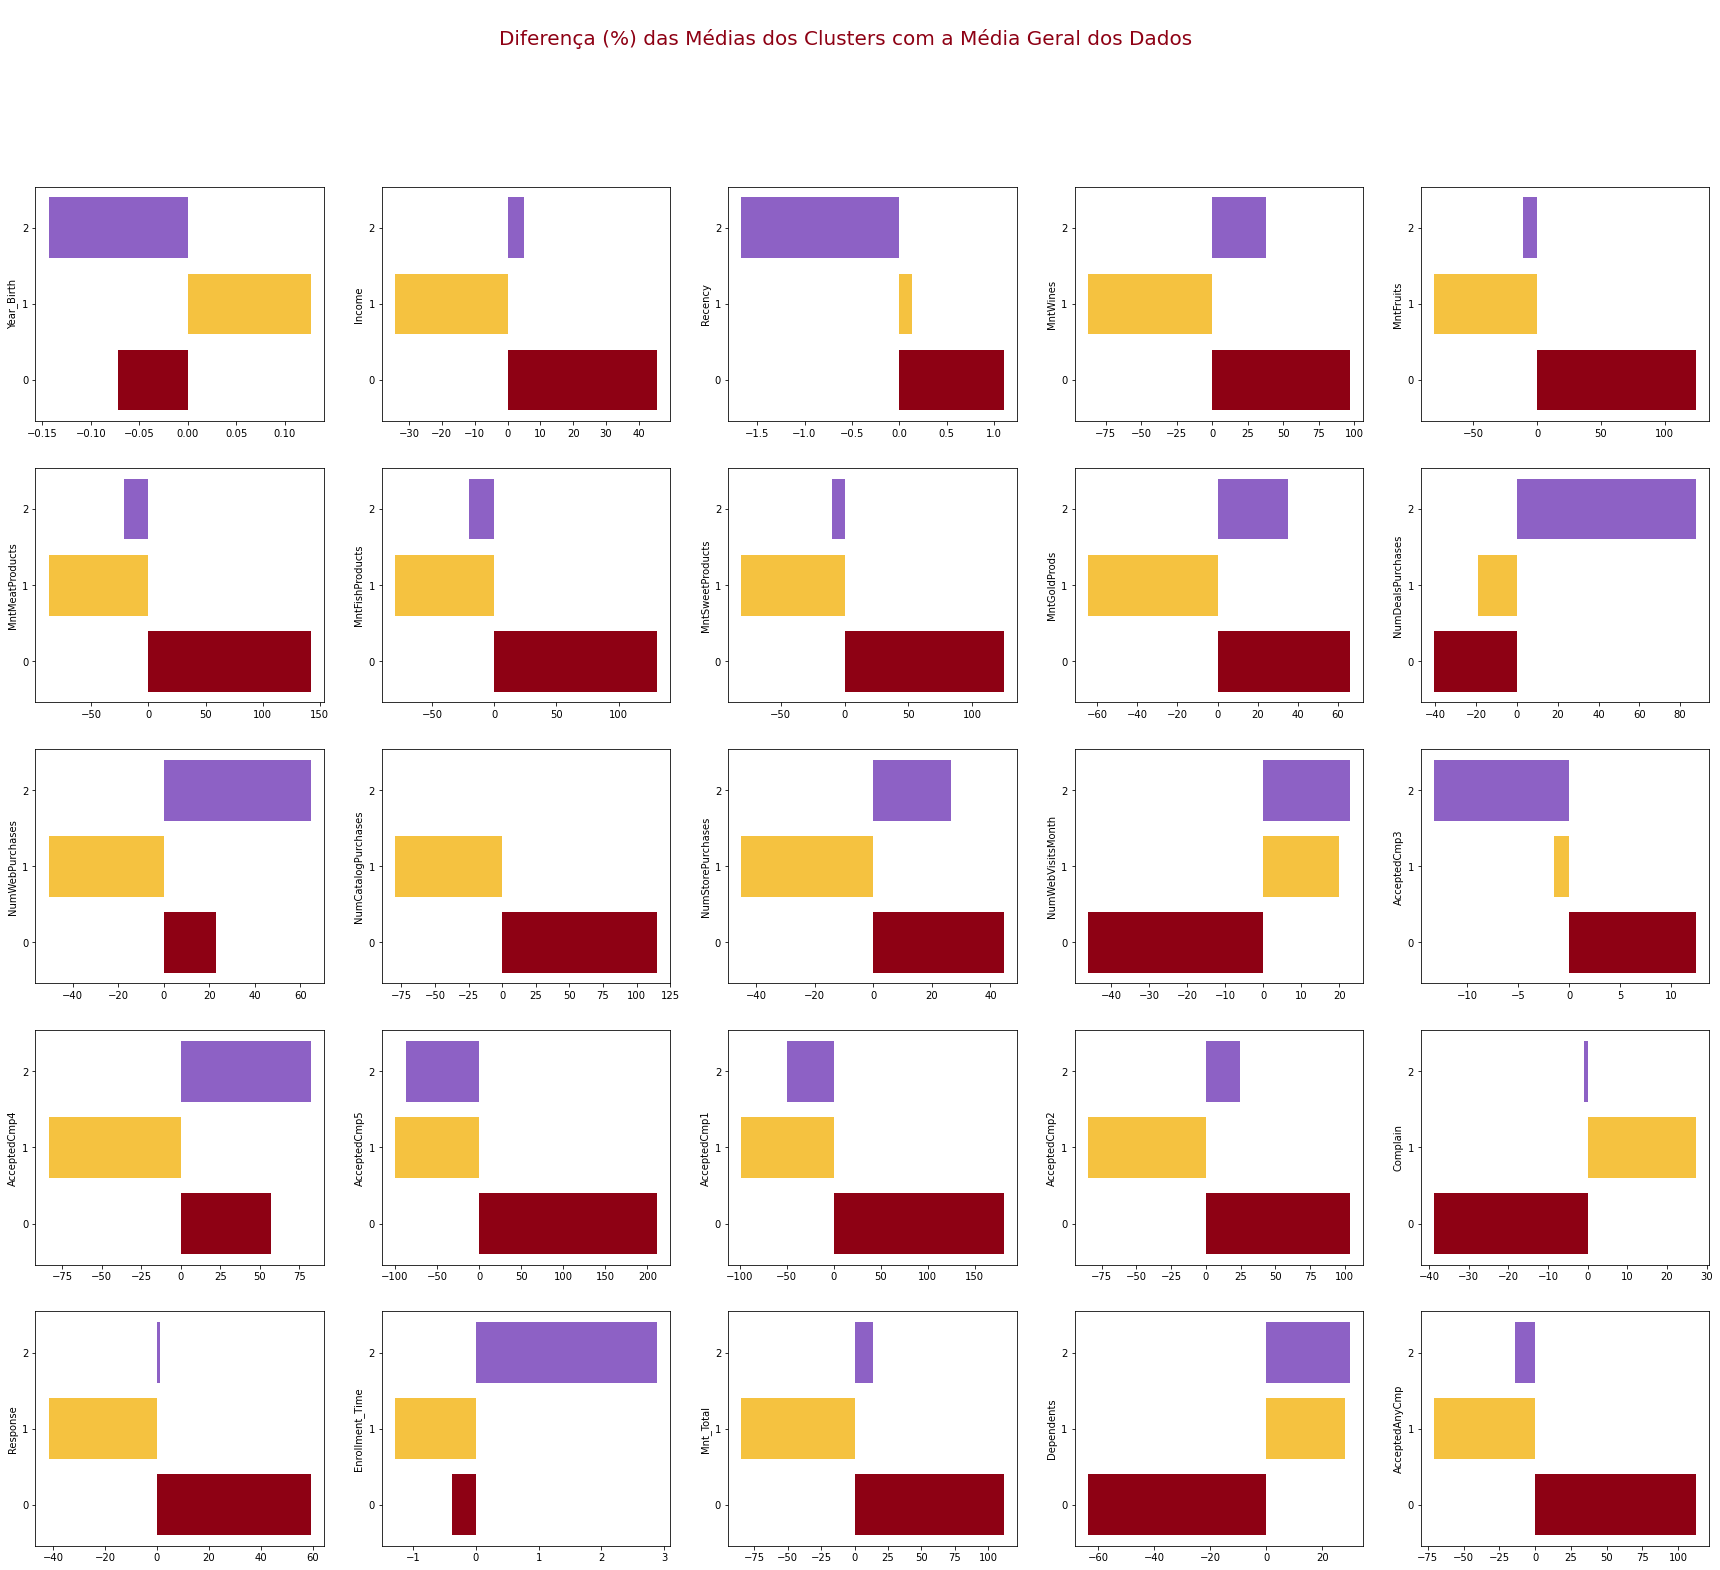

In [37]:
media_geral = dataset_final.drop('Cluster', axis=1).describe().transpose()['mean']
media_cluster = dataset_final.groupby('Cluster').mean().transpose()

#calcular diferença (%) das médias dos clusters com a média geral dos dados
for i in range(0, k):
    media_cluster[i] = ((media_cluster[i] - media_geral)/media_geral)*100

#criar gráfico
fig, ax = plt.subplots(5, 5, figsize=(30,25))
fig.suptitle('\nDiferença (%) das Médias dos Clusters com a Média Geral dos Dados', fontsize=20, color='#8E0114')
ax = ax.flatten()
for i in range(0, len(media_cluster)):
    ax[i].barh(y=media_cluster.columns[0], width=media_cluster[i:i+1].values[0][0], color=color[0])
    ax[i].barh(y=media_cluster.columns[1], width=media_cluster[i:i+1].values[0][1], color=color[1])
    ax[i].barh(y=media_cluster.columns[2], width=media_cluster[i:i+1].values[0][2], color=color[2])
    ax[i].set_ylabel(media_cluster[i:i+1].index[0])
    ax[i].set_yticks([0, 1, 2])

In [38]:
#função para criação dos histogramas dos clusters
###########################################################
def histogram_plotly(feature):
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=dataset_final[dataset_final['Cluster']==0][feature], name='Cluster 0', marker_color=color[0]))
    fig.add_trace(go.Histogram(x=dataset_final[dataset_final['Cluster']==1][feature], name='Cluster 1', marker_color=color[1]))
    fig.add_trace(go.Histogram(x=dataset_final[dataset_final['Cluster']==2][feature], name='Cluster 2', marker_color=color[2]))
    fig.update_layout(barmode='overlay', title_text=f'Distribuição de Frequências: {feature}', yaxis_title_text='Quantidade',
                      xaxis_title_text=feature, paper_bgcolor = '#FFFFFE', plot_bgcolor = '#FFFFFE', width=970, height=450,
                      legend_orientation='h', legend_font_size=15, legend_y=1.13, legend_x=0.3)
    fig.update_traces(opacity=0.75)
    return fig.show()
###########################################################

aux = ['Income', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Mnt_Total', 'Dependents', 'AcceptedAnyCmp']

for coluna in dataset_final[aux].columns:
    histogram_plotly(coluna)


Gráfico de Dispersão em Pares de Características:



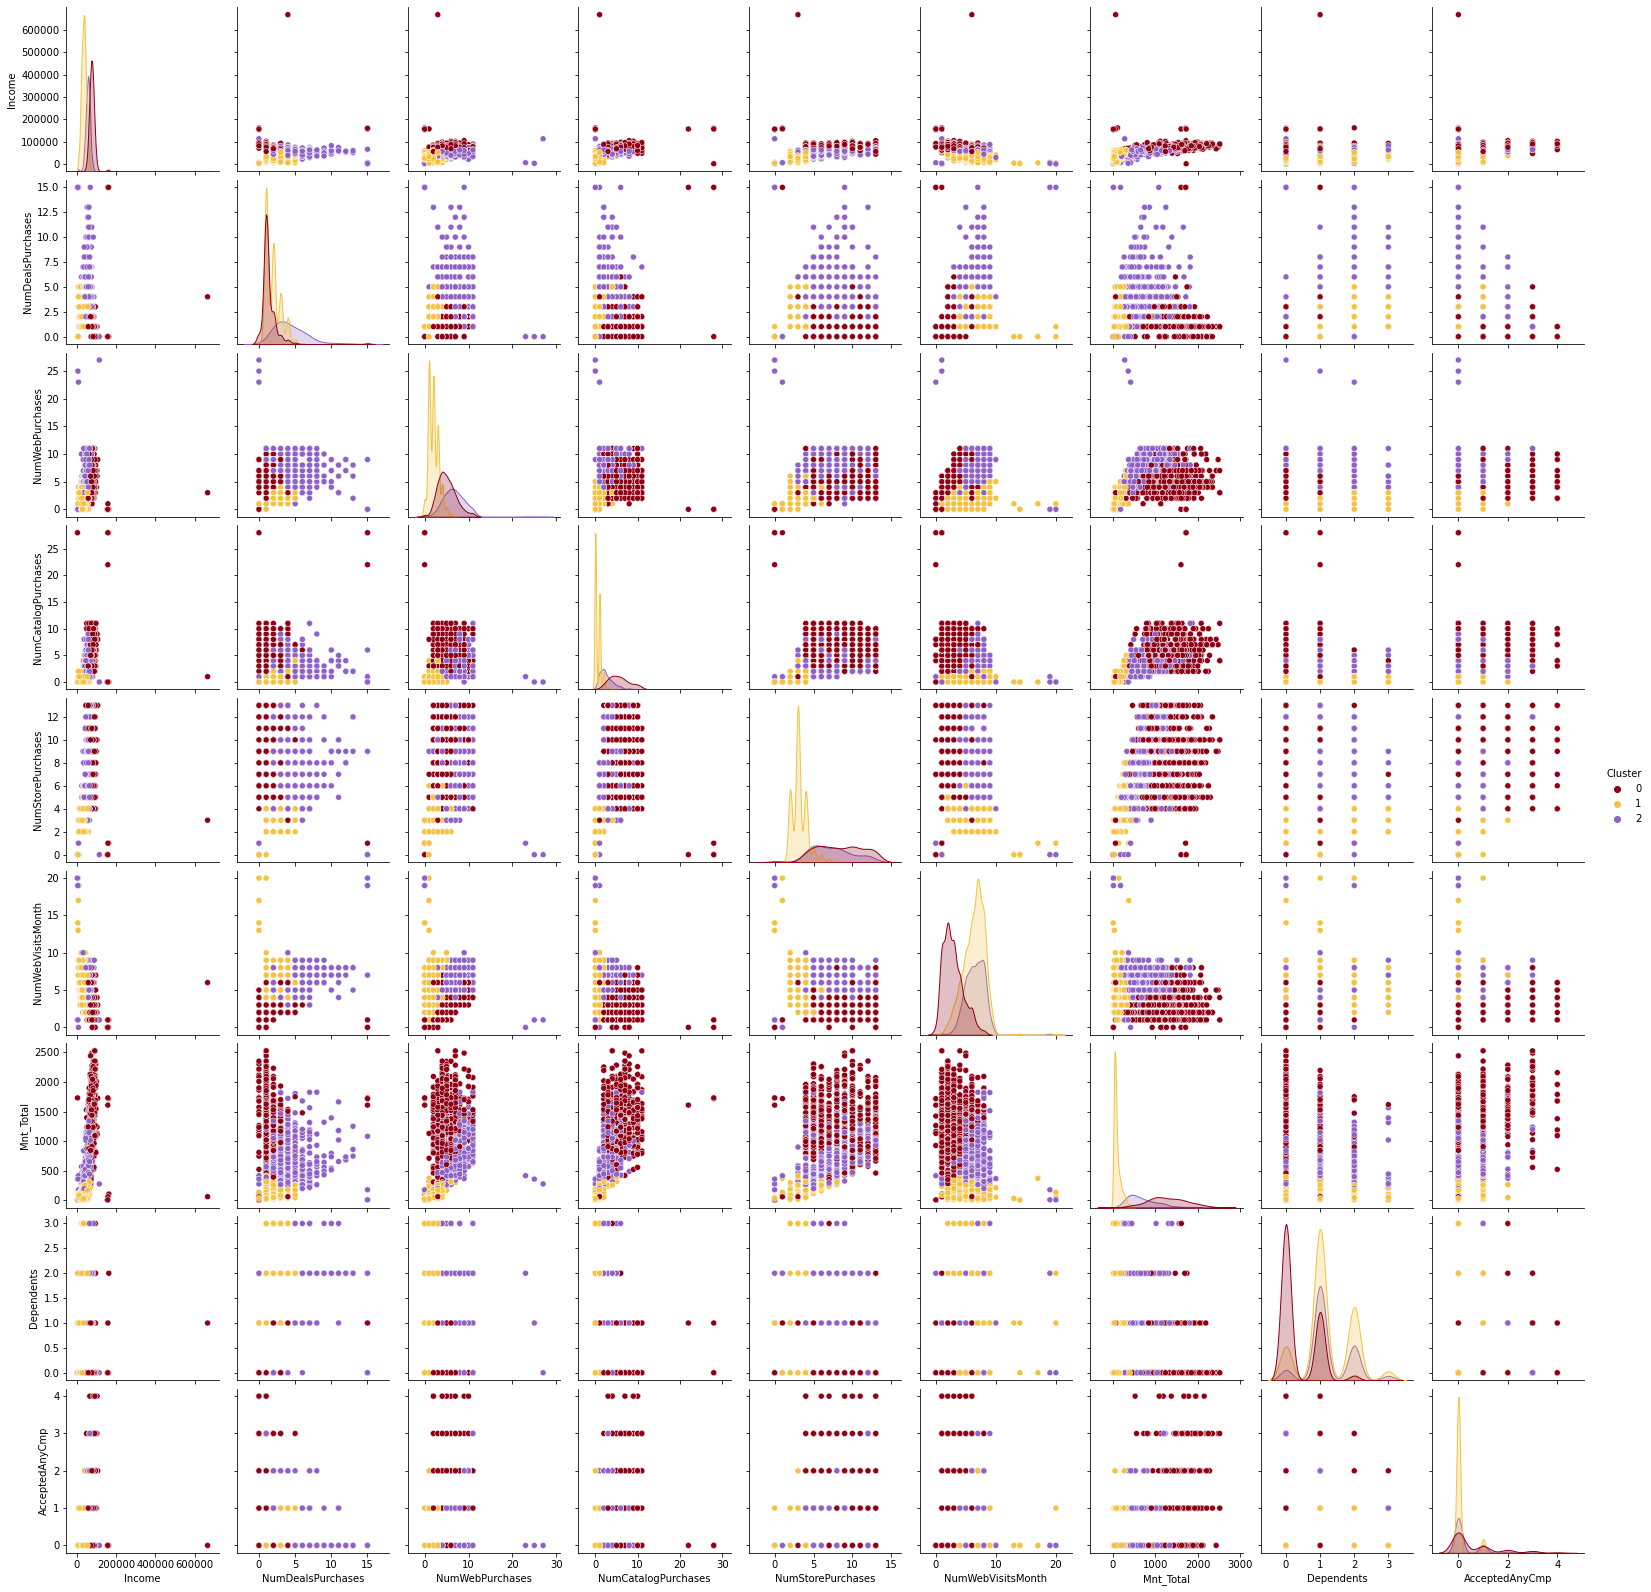

In [39]:
aux.append('Cluster')
print('\nGráfico de Dispersão em Pares de Características:\n')
sns.pairplot(data=dataset_final[aux], hue='Cluster', palette=color)
plt.show()
aux.remove('Cluster')

<div style="color:#8E0114; font-size:150%; text-align:left; border-radius:5px">
    <h4><u> CRIAR MODELO PREDITIVO </u></h4>
</div>

Antes de criarmos nosso modelo preditivo para classificação dos clientes mais suscetíveis a participar da sexta campanha de marketing, **vamos entender primeiro, quais são as características dos clientes que aceitaram a oferta na simulação da sexta campanha**. <br>

Relembrando os resultados observados no Mapa de Calor para Análise de Correlação, **temos que:** <br>

Clientes que **participaram ativamente em mais campanhas** e que **realizaram compras mais recentemente** deram um sinal mais positivo à oferta. Isso pode retratar uma satisfação dos clientes com a participação em campanhas anteriores e uma experiência de compra positiva e mais aflorada. <br>

Agradamos mais os **consumidores de vinhos e carnes** e que **preferem comprar por catálogo**. Sabemos que em sua maioria **não são casados** e nem vivem junto de seus companheiros e, provavelmente por isso, possuem também **menos dependentes**. <br>

Os **clientes das campanhas 5 e 1 parecem ter uma maior similaridade** com os possíveis clientes da sexta campanha, isso poderia ser explicado talvez pela semelhança dos produtos. Mas, como não temos esta informação, seria importante abrir este tipo de investigação em outros dados. <br>
<hr>
Feita esta primeira análise, vamos preparar os dados para criação do modelo. Inicialmente separaremos os dados para teste, treino e validação em variáveis independentes (x) e variável dependente (y), ajustaremos as variáveis qualitativas existentes, padronizaremos e balancearemos os dados.

**Separar, Padronizar e Balancear os Dados:**

In [40]:
y = dataset_final['Response']
x = dataset_final.drop('Response', axis=1)

x = x.replace({'High School': 1, 'Graduation': 2, 'Postgraduate': 3})
x = pd.get_dummies(x)

x = (x - x.mean())/x.std()

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)
x_val, x_teste, y_val, y_teste = train_test_split(x_teste, y_teste, test_size=0.5, random_state=1)

In [41]:
print(f'Tamanho dos Dados de Treino: {len(x_treino)}')
print(f'Tamanho dos Dados de Teste: {len(x_teste)}')
print(f'Tamanho dos Dados de Validação: {len(x_val)}')

Tamanho dos Dados de Treino: 1551
Tamanho dos Dados de Teste: 333
Tamanho dos Dados de Validação: 332


O **balanceamento** dos dados aqui visa equilibrar o número de clientes que aceitaram a oferta do projeto piloto com os clientes que não aceitaram. Utilizamos aqui de uma técnica para **oversampling na base de dados para treino**, assim, nosso modelo terá mais dados de treino para identificar as características dos clientes que aceitaram a oferta.

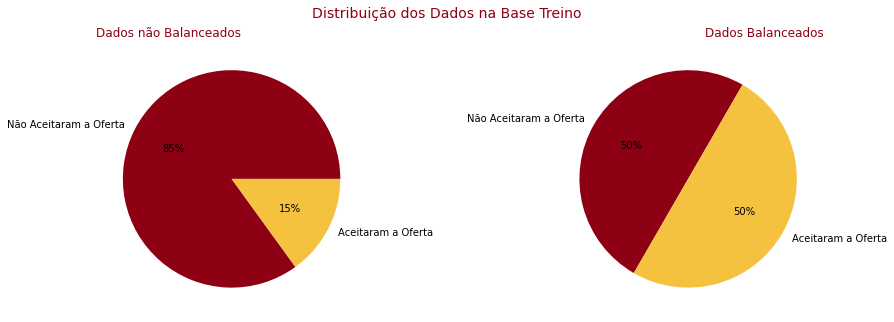

Tamanho dos Dados de Treino Balanceados: 2636


In [42]:
balanceamento_over = SMOTE(random_state=1)
x_bal, y_bal = balanceamento_over.fit_resample(x_treino, y_treino)

fig, ax = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Distribuição dos Dados na Base Treino', fontsize=14, color='#8E0114')

ax[0].pie(x=y_treino.value_counts().values, 
        labels = ['Não Aceitaram a Oferta', 'Aceitaram a Oferta'], colors = ['#8E0114', '#F5C240'], autopct='%.0f%%')
ax[0].set_title('Dados não Balanceados', fontsize=12, color='#8E0114', loc='left')

ax[1].pie(x=y_bal.value_counts().values, labels = ['Não Aceitaram a Oferta', 'Aceitaram a Oferta'],
          colors = ['#8E0114', '#F5C240'], autopct='%.0f%%', startangle=60)
ax[1].set_title('Dados Balanceados', fontsize=12, color='#8E0114', loc='right')

plt.show()

print(f'Tamanho dos Dados de Treino Balanceados: {len(x_bal)}')

<hr>

Para criação do modelo, testaremos inicialmente cinco algoritmos diferentes para escolhermos um que melhor resultado nos entregue. Os algoritmos analisados serão: **Random Forest, Suport Vector Machine, Linear Regression, K Neighbor Nearest e Gradient Booster**.

**Vamos analisar os resultados obtidos**:

In [43]:
randomforest = RandomForestClassifier(random_state=1)
suportvectormachine = svm.SVC(random_state=1)
regressaologistica = LogisticRegression(random_state=1)
knn = KNeighborsClassifier()
gradientboosting = GradientBoostingClassifier(random_state=1)

modelos_classificacao = {'Random Forest': randomforest, 'Supor Vector Machine': suportvectormachine,
                         'Logistic Regression': regressaologistica, 'K Nearest Neighbor': knn,
                         'Gradient Boosting': gradientboosting}

for nome_modelo, modelo in modelos_classificacao.items():
    modelo.fit(x_bal, y_bal)
    y_pred = modelo.predict(x_teste)
    print(f'\n\nRelatório de Classificação {nome_modelo}:\n\n',classification_report(y_teste, y_pred))



Relatório de Classificação Random Forest:

               precision    recall  f1-score   support

           0       0.93      0.95      0.94       286
           1       0.67      0.60      0.63        47

    accuracy                           0.90       333
   macro avg       0.80      0.77      0.79       333
weighted avg       0.90      0.90      0.90       333



Relatório de Classificação Supor Vector Machine:

               precision    recall  f1-score   support

           0       0.96      0.84      0.90       286
           1       0.45      0.79      0.57        47

    accuracy                           0.83       333
   macro avg       0.70      0.81      0.73       333
weighted avg       0.89      0.83      0.85       333



Relatório de Classificação Logistic Regression:

               precision    recall  f1-score   support

           0       0.96      0.82      0.88       286
           1       0.42      0.81      0.55        47

    accuracy                   

Como neste nosso problema precisamos encontrar a maioria dos clientes em potencial da nossa nova campanha, temos então um **alto custo associado ao Falsos Negativos**, pois, caso tenhamos um cliente em potencial não detectado pelo modelo, diminuímos a taxa de sucesso da nossa campanha e consequentemente diminuiremos o seu retorno. Para melhor avaliar esta situação utilizaremos da **métrica de Recall**.

Analisando principalmente este indicador nos relatórios acima, percebemos que Logistic Regression e K Nearest Neighbor se destacam com Recall de 81%. Como Logistic Regression aparece ligeiramente melhor, com Acuracidade de 82% contra 77%, **optaremos pela escolha do Modelo Logistic Regression**.

Como inicialmente padronizamos nossos dados, fica agora possível um melhor entendimento da **importância de cada característica dentro do modelo**, pois conseguimos ver o peso de cada uma sem o viés de sua dimensionalidade.

**Abaixo temos esta visualização**: <br> 

A ponderação da importância será dada através do módulo do coeficiente de importância, pois, seu sinal é apenas um indicador da classificação. Ou seja, quanto maior ou menor o valor do coeficiente, maior será a probabilidade de o evento acontecer ou não acontecer, respectivamente.

In [44]:
def feature_importance(data, x):
    feature_importances = pd.DataFrame(data=data, columns=x.columns).transpose()
    feature_importances = feature_importances.rename(columns={0: 'Coeficiente de Importancia'})
    feature_importances['Ponderação (%) da Importancia'] = ((abs(feature_importances)/abs(feature_importances).sum())*100).round(0)
    feature_importances = feature_importances.sort_values(by='Ponderação (%) da Importancia', ascending=False)
    return display(feature_importances)

feature_importance(regressaologistica.coef_, x)

Coeficiente de Importancia  \
Recency                                      -1.237865   
Enrollment_Time                               1.013857   
MntMeatProducts                               0.771447   
NumStorePurchases                            -0.751392   
NumWebVisitsMonth                             0.543468   
AcceptedAnyCmp                                0.477486   
Education                                     0.554133   
NumCatalogPurchases                           0.372628   
Marital_Status_Accompanied                   -0.371674   
Cluster                                      -0.390837   
AcceptedCmp5                                  0.386476   
AcceptedCmp3                                  0.392049   
Marital_Status_Alone                          0.371674   
NumDealsPurchases                             0.384200   
MntWines                                     -0.414630   
NumWebPurchases                               0.332127   
Dependents                                   -0.261382   
AcceptedCmp4                                  0.188357   
MntSweetProducts                              0.259068   
AcceptedCmp1                                  0.243866   
MntFishProducts                              -0.216069   
AcceptedCmp2                                  0.106118   
Complain                                     -0.154905   
Year_Birth                                    0.122699   
MntGoldProds                                 -0.010839   
Mnt_Total                                     0.050126   
MntFruits                                    -0.029745   
Income                                        0.019869   

                            Ponderação (%) da Importancia  
Recency                                              12.0  
Enrollment_Time                                      10.0  
MntMeatProducts                                       7.0  
NumStorePurchases                                     7.0  
NumWebVisitsMonth                                     5.0  
AcceptedAnyCmp                                        5.0  
Education                                             5.0  
NumCatalogPurchases                                   4.0  
Marital_Status_Accompanied                            4.0  
Cluster                                               4.0  
AcceptedCmp5                                          4.0  
AcceptedCmp3                                          4.0  
Marital_Status_Alone                                  4.0  
NumDealsPurchases                                     4.0  
MntWines                                              4.0  
NumWebPurchases                                       3.0  
Dependents                                            3.0  
AcceptedCmp4                                          2.0  
MntSweetProducts                                      2.0  
AcceptedCmp1                                          2.0  
MntFishProducts                                       2.0  
AcceptedCmp2                                          1.0  
Complain                                              1.0  
Year_Birth                                            1.0  
MntGoldProds                                          0.0  
Mnt_Total                                             0.0  
MntFruits                                             0.0  
Income                                                0.0

Buscando uma simplificação e um possível ganho nos resultados, selecionaremos para um novo treino apenas as principais características utilizadas pelo modelo. Consideremos agora então as características com Ponderação maior ou igual a 5 para análise dos resultados.

In [45]:
aux = ['Recency', 'Enrollment_Time', 'MntMeatProducts', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedAnyCmp', 'Education']

regressaologistica.fit(x_bal[aux], y_bal)
y_pred = regressaologistica.predict(x_teste[aux])
print(f'\n\nRelatório de Classificação (Logistic Regression):\n\n',classification_report(y_teste, y_pred))

feature_importance(regressaologistica.coef_, x[aux])



Relatório de Classificação (Logistic Regression):

               precision    recall  f1-score   support

           0       0.96      0.79      0.86       286
           1       0.38      0.79      0.51        47

    accuracy                           0.79       333
   macro avg       0.67      0.79      0.69       333
weighted avg       0.88      0.79      0.81       333



Coeficiente de Importancia  Ponderação (%) da Importancia
Recency                             -1.088447                           20.0
MntMeatProducts                      1.094641                           20.0
AcceptedAnyCmp                       1.086007                           20.0
Enrollment_Time                      0.817420                           15.0
NumStorePurchases                   -0.543371                           10.0
NumWebVisitsMonth                    0.510809                            9.0
Education                            0.411972                            7.0

O modelo praticamente se manteve com os mesmos resultados, perdemos agora 2% em Recall e 3% em acuracidade. Mas, como restringimos o input de 28 características para apenas 7, entendo que a **alteração do modelo foi ainda assim positiva**.

Com este resultado podemos ter **novos insights sobre possíveis características dos clientes alvo da campanha**. Somando ao já observado anteriormente podemos complementar que, pelo modelo, nosso público alvo **possui mais tempo de cadastro na companhia, não realizam muitas compras em lojas, frequentem mais o site da empresa e possuem um grau de escolaridade mais elevado.**

Vamos aplicar nosso modelo nos dados de validação, ainda desconhecidos, e verificar os resultados obtidos:

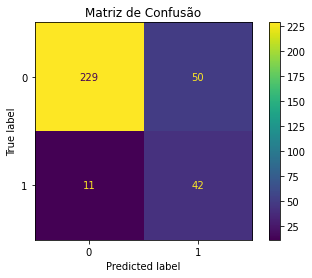



Relatório de Classificação (Logistic Regression):

               precision    recall  f1-score   support

           0       0.95      0.82      0.88       279
           1       0.46      0.79      0.58        53

    accuracy                           0.82       332
   macro avg       0.71      0.81      0.73       332
weighted avg       0.87      0.82      0.83       332



In [46]:
y_pred = regressaologistica.predict(x_val[aux])

grafico = ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred), display_labels=regressaologistica.classes_)
grafico.plot()
plt.title('Matriz de Confusão')
plt.show()

print(f'\n\nRelatório de Classificação (Logistic Regression):\n\n',classification_report(y_val, y_pred))

Nosso modelo de Regressão Logística final leva em consideração sete características para predição dos clientes a aderirem a próxima campanha. <br>

São elas:
1) Número de dias desde a última compra; <br>
2) Valor gasto em carnes nos últimos dois anos; <br>
3) Total de campanhas de marketing que o cliente já participou; <br>
4) Anos como cliente da empresa; <br>
5) Número de compras realizadas nas lojas físicas; <br>
6) Número de visitas no site da empresa no último mês; <br>
7) Grau de escolaridade: Menor ou igual ao ensino médio completo, graduação ou pós-graduação.

**O resultado obtido foi:**

- **Identificação de 42 dos 53 clientes (79%) que aceitaram a oferta do projeto piloto. Relembrando que a identificação destes clientes é o fator crucial para o sucesso da campanha;** <br>


- **Um direcionamento da campanha para 50 clientes não interessados dentro dos 279 conhecidos, represetando um erro de 18%. A oferta a clientes não interessados impacta em um maior custo para a divulgação da campanha;** <br>


- **Modelo final atingiu uma precisão geral de 82% de acuracidade.**

Lembrando que, para um maior sucesso da campanha o entendimento dos produtos ofertados é crucial, bem como o entendimento de sua sazonalidade, se existir, e dos meios de divulgação a serem utilizados. Necessitando assim de uma análise também destes dados aqui não contidos. 

Quanto à maximização dos lucros, temos que levar em conta os custos fixos e variáveis da campanha. Com isso, depois que classificarmos todos os clientes da empresa com o modelo obtido, conseguiremos descobrir qual o ponto de equilíbrio desta oferta, tornando possível a análise da sua viabilidade antes da execução. Caso não visualizarmos um cenário satisfatório, tentar buscar minimizar os custos ou tentar angariar mais clientes, deixando o produto mais atrativo, para assim tornar a campanha mais lucrativa.